# MLPR Week 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

###### Example 1

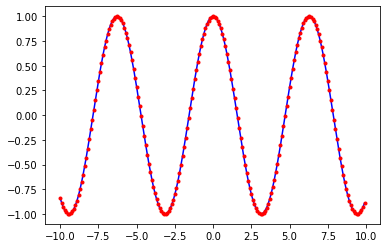

In [12]:
grid_size = 0.1
x_grid = np.arange(-10,10,grid_size)
f_vals = np.cos(x_grid)
plt.clf()
plt.plot(x_grid, f_vals, 'b-')
plt.plot(x_grid, f_vals, 'r.')
plt.show()

###### Example 2

In [15]:
def rbf_1d(xx, cc, hh):
    return np.exp(-(xx-cc)** 2 / hh**2)

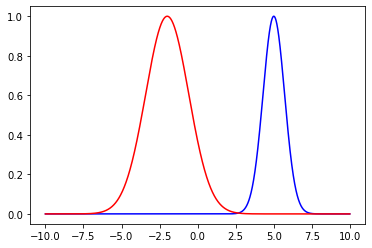

In [16]:
plt.clf()
grid_size = 0.01
x_grid = np.arange(-10,10,grid_size)
plt.plot(x_grid, rbf_1d(x_grid, cc=5, hh=1), '-b')
plt.plot(x_grid, rbf_1d(x_grid, cc=-2, hh=2), '-r')
plt.show()

###### Example 3

In [17]:
def log_sim(xx, vv, bb):
    return 1/(1 + np.e**(-(vv*xx)-bb))

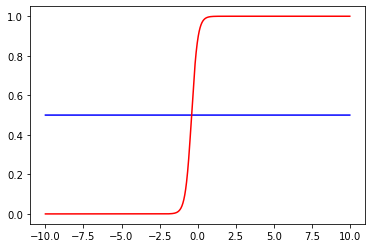

In [35]:
plt.clf()
grid_size = 0.01
x_grid = np.arange(-10,10,grid_size)
plt.plot(x_grid, log_sim(x_grid, vv=0, bb=0), '-b')
plt.plot(x_grid, log_sim(x_grid, vv=5, bb=2), '-r')
plt.show()

###### Example 4

In [40]:
# phi-functions to create various matrices of new features
# from an original matrix of 1D inputs.
def phi_linear(Xin):
    return np.hstack([np.ones((Xin.shape[0],1)), Xin])
def phi_quadratic(Xin):
    return np.hstack([np.ones((Xin.shape[0],1)), Xin, Xin**2])
def fw_rbf(xx, cc):
    """fixed-width RBF in 1d"""
    return np.exp(-(xx-cc)**2 / 2.0)
def phi_rbf(Xin):
    return np.hstack([fw_rbf(Xin, 1), fw_rbf(Xin, 2), fw_rbf(Xin, 3)])

In [41]:
def fit_and_plot(phi_fn, X, yy):
    # phi_fn takes N, inputs and returns N,K basis function values
    w_fit = np.linalg.lstsq(phi_fn(X), yy, rcond=None)[0] # K,
    X_grid = np.arange(0, 4, 0.01)[:,None] # N,1
    f_grid = np.dot(phi_fn(X_grid), w_fit)
    plt.plot(X_grid, f_grid, linewidth=2)

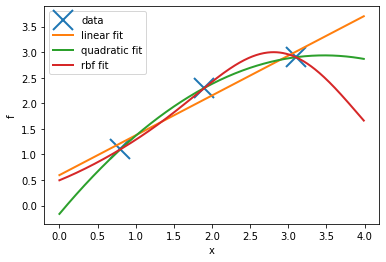

In [42]:
yy = np.array([1.1,2.3,2.9]) #N
X = np.array([[0.8],[1.9],[3.1]]) #N,1
plt.clf()
plt.plot(X, yy, 'x', markersize=20, mew=2)
    
fit_and_plot(phi_linear, X, yy)
fit_and_plot(phi_quadratic, X, yy)
fit_and_plot(phi_rbf, X, yy)
plt.legend(('data', 'linear fit', 'quadratic fit', 'rbf fit'))
plt.xlabel('x')
plt.ylabel('f')

plt.show()